In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
from syntactic_complexity import analyze_text

In [5]:
initial = analyze_text("Logo após sair da aula, Bianca teve um encontro com Arthur.")
initial

{'MLC': 15.0,
 'MLS': 15.0,
 'DCC': 1.0,
 'CPC': 0.0,
 'profundidade_media': 3.0,
 'profundidade_max': 3,
 'ttr': 1.1538461538461537,
 'lexical_density': 0.3333333333333333,
 'lexical_sophistication': 1.0,
 'text': 'Logo após sair da aula, Bianca teve um encontro com Arthur.'}

In [6]:
data = []
directory = "Redações/humanos/Desafios para o enfrentamento da invisibilidade do trabalho de cuidado realizado pela mulher no Brasil/"
for filename in os.listdir(directory):
    # Construct the full file path
    file_path = os.path.join(directory, filename)

    with open(file_path, "r") as file:
        row = analyze_text(file.read())
        data.append(row)

In [7]:
df = pd.DataFrame(data)
df["type"] = "human"
df.head()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,lexical_density,lexical_sophistication,text,type
0,12.461538,30.375000,0.615385,0.205128,5.375000,8,0.612903,0.397119,0.918367,Conforme estudos demográficos realizados pelo ...,human
1,23.950000,31.933333,0.750000,1.900000,5.733333,8,0.501149,0.373695,0.900000,O trabalho de cuidado se mostra necessário na ...,human
2,16.097561,41.250000,0.585366,0.780488,7.250000,10,0.548552,0.377273,0.961538,A filósofa contemporânea Hannah Arendt constat...,human
3,14.250000,32.571429,0.562500,1.062500,6.142857,15,0.577500,0.359649,0.976744,"Na obra “Utopia”, de Thomas More, é retratada ...",human
4,18.024390,41.055556,0.682927,0.902439,6.277778,11,0.511628,0.369418,0.924528,"A Constituição Cidadã traz, entre suas diretri...",human


In [8]:
data = []
directory = "Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/"
for filename in os.listdir(directory):
    # Construct the full file path
    file_path = os.path.join(directory, filename)

    with open(file_path, "r") as file:
        row = analyze_text(file.read())
        data.append(row)

In [9]:
machine = pd.DataFrame(data)
machine["type"] = "LLM"
machine.head()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,lexical_density,lexical_sophistication,text,type
0,14.527778,47.545455,0.750000,1.333333,7.454545,13,0.454545,0.397706,0.902439,"No Brasil, a invisibilidade do trabalho de cui...",LLM
1,15.157895,48.000000,0.657895,1.473684,8.250000,12,0.452514,0.394097,0.958333,A invisibilidade do trabalho de cuidado realiz...,LLM
2,16.468750,40.538462,0.718750,1.593750,6.692308,10,0.466387,0.407970,0.930233,A invisibilidade do trabalho de cuidado realiz...,LLM
3,16.916667,40.600000,0.750000,1.250000,7.733333,10,0.370175,0.385878,0.938776,"Com base em sua solicitação, segue a redação m...",LLM
4,12.439024,42.500000,0.609756,0.902439,7.916667,10,0.459916,0.380392,0.955556,É inegável que a invisibilidade do trabalho de...,LLM


In [10]:
df = pd.concat([df,machine])

In [11]:
df.sample(5).head()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,lexical_density,lexical_sophistication,text,type
9,16.864865,39.000000,0.648649,0.864865,6.062500,10,0.481283,0.403846,0.982143,"Por meio do seu livro ""Brasil, país do futuro""...",human
11,13.153846,36.642857,0.615385,0.974359,7.071429,9,0.464363,0.380117,0.897959,O tema da invisibilidade do trabalho de cuidad...,LLM
7,17.666667,48.181818,0.800000,1.266667,7.818182,9,0.446281,0.360377,0.972973,"Vivemos em uma sociedade que, mesmo com avanço...",LLM
5,16.892857,43.000000,0.642857,1.607143,7.181818,10,0.463470,0.372093,1.000000,A invisibilidade do trabalho de cuidado realiz...,LLM
0,12.461538,30.375000,0.615385,0.205128,5.375000,8,0.612903,0.397119,0.918367,Conforme estudos demográficos realizados pelo ...,human


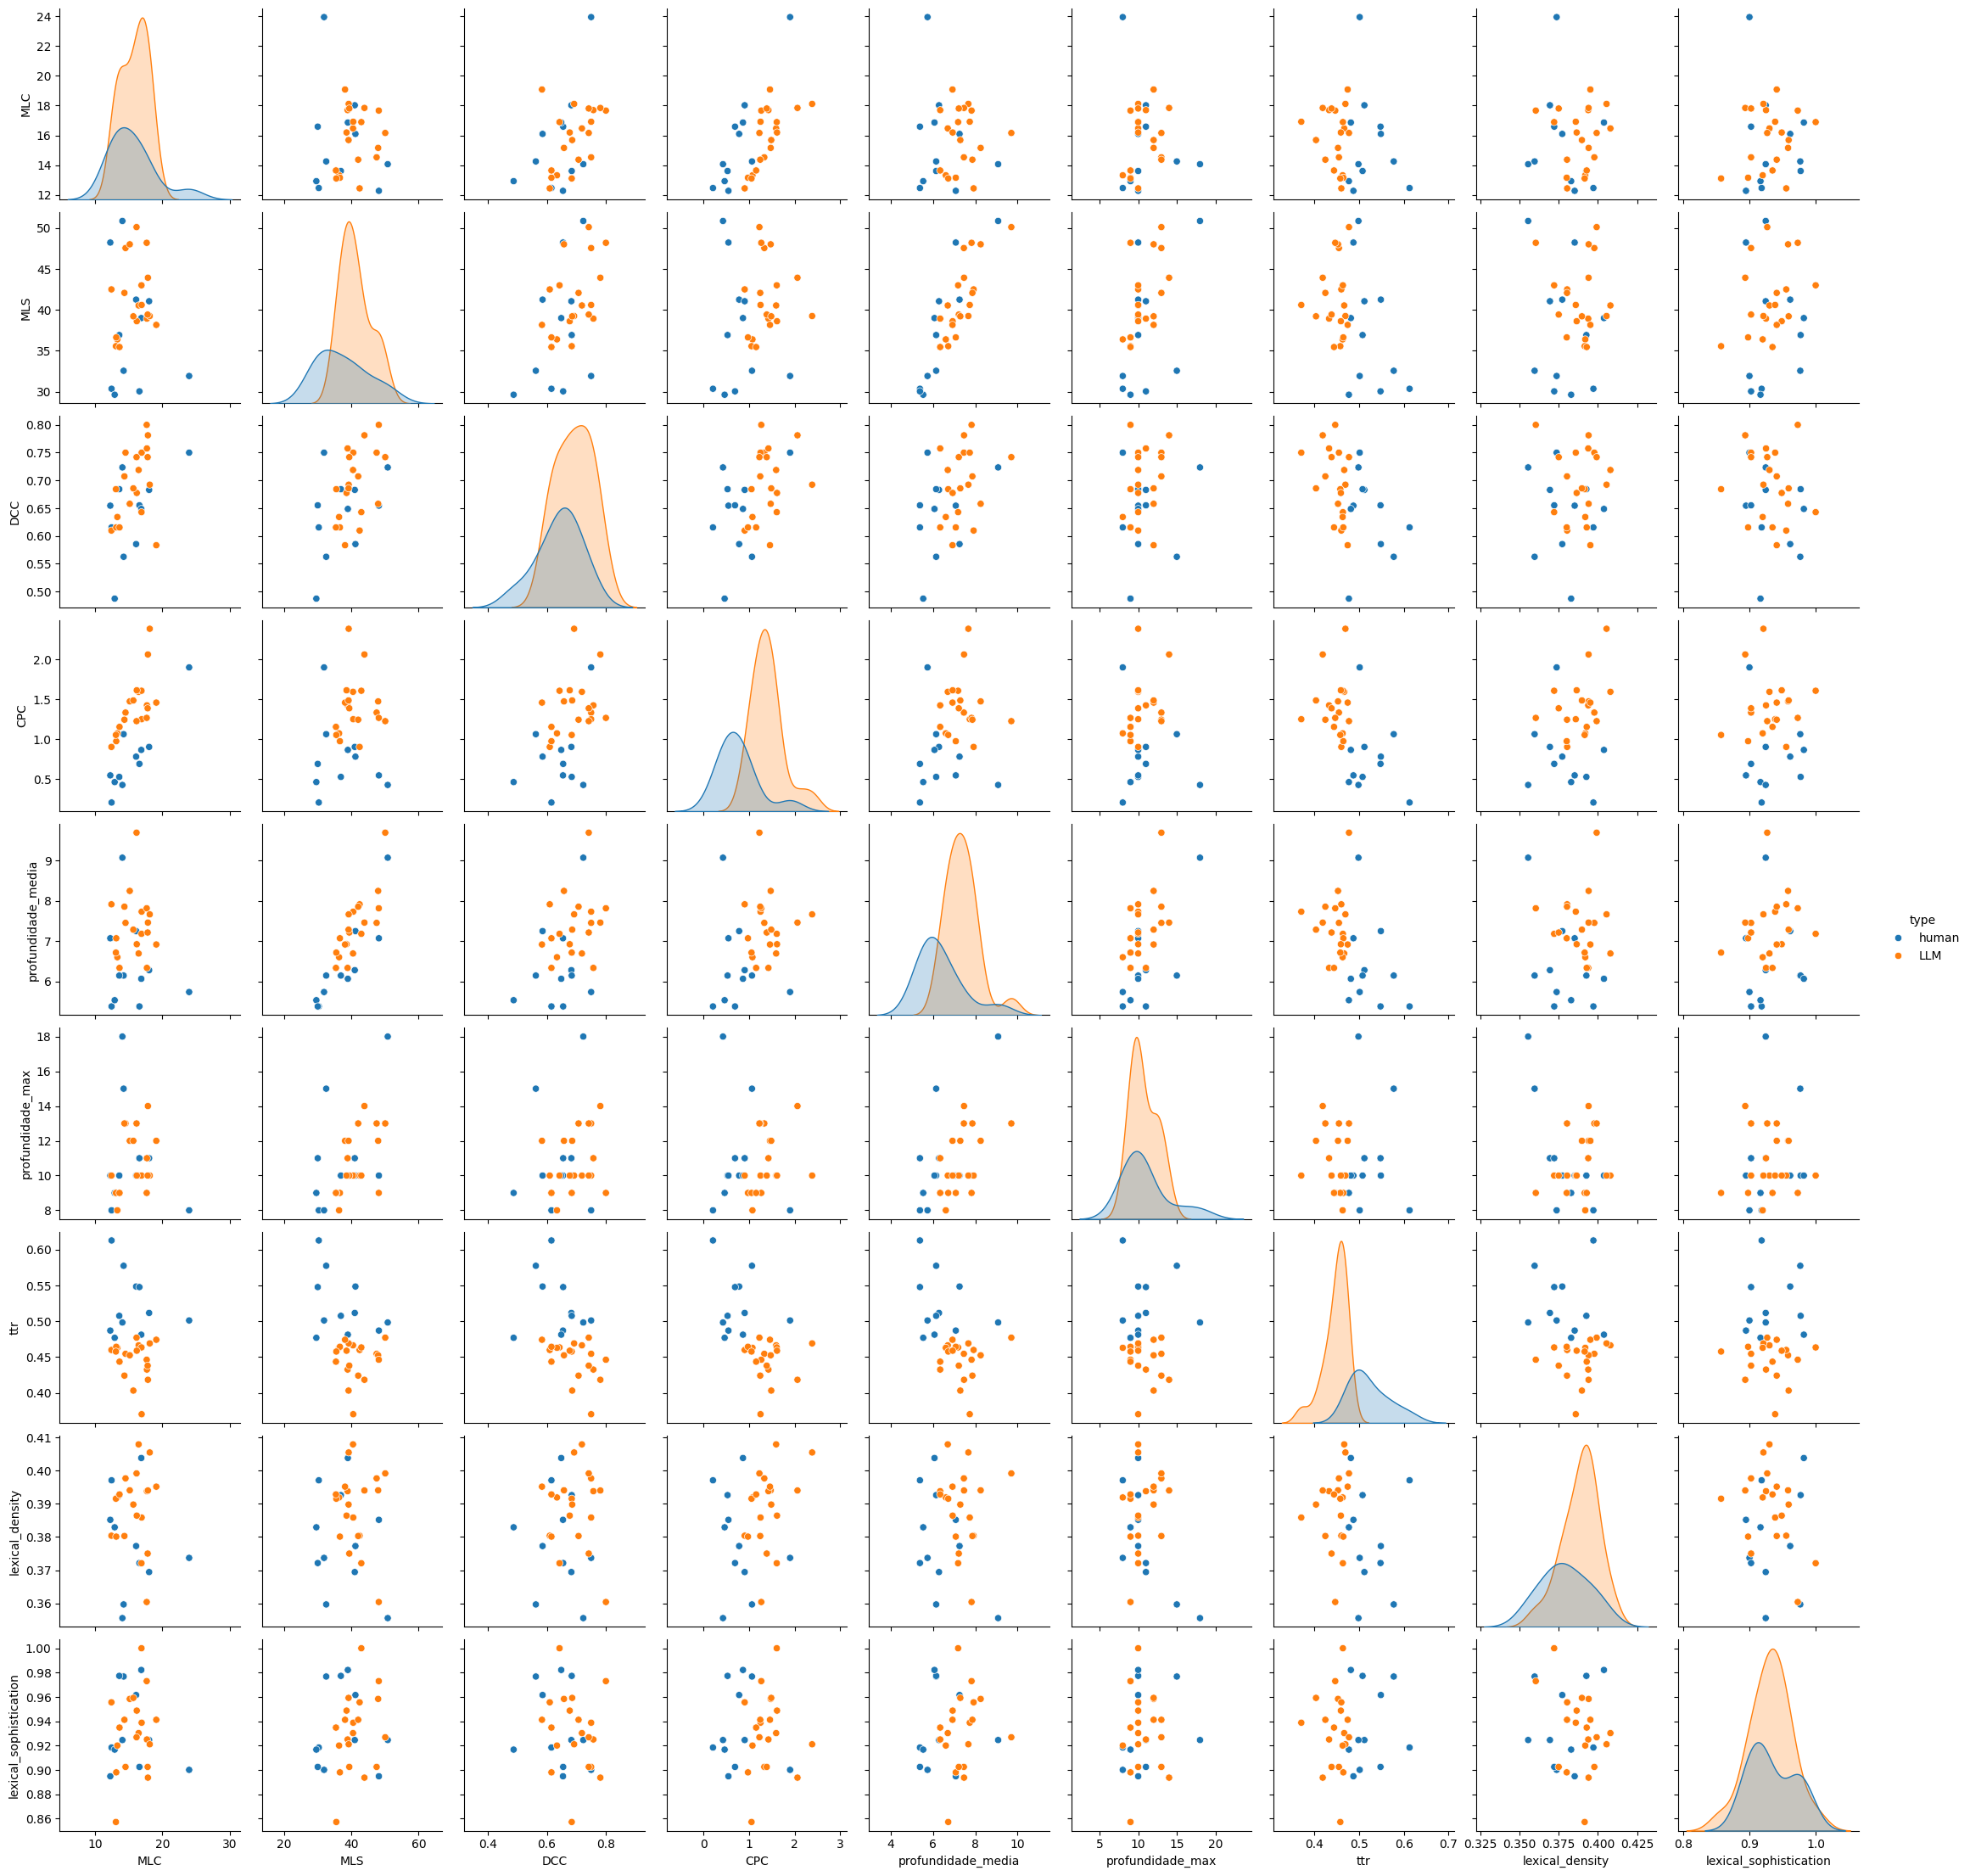

In [12]:
sns.pairplot(df,hue="type")

In [13]:
from scipy.stats import ttest_ind
from scipy.stats import anderson


grouped_data = df.groupby('type')

group1 = grouped_data.get_group("human")
group2 = grouped_data.get_group("LLM")

ttest_results = {
    'Feature': [],
    'T-Statistic': [],
    'P-Value': [],
    'Significant': [],
    'Normality': []
}
for column in df.select_dtypes(include='number').columns:
    # Extract the data for each group for the current column
    data1 = group1[column]
    data2 = group2[column]
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(data1, data2)
    
    # Determine if the result is significant (p-value < 0.05)
    significant = p_value < 0.05

    normal = anderson(data1, 'norm').statistic < 0.05
    
    # Store the results in the dictionary
    ttest_results['Feature'].append(column)
    ttest_results['T-Statistic'].append(t_stat)
    ttest_results['P-Value'].append(p_value)
    ttest_results['Significant'].append(significant)
    ttest_results['Normality'].append(normal)

In [14]:
results_df = pd.DataFrame(ttest_results)
results_df.sort_values(by = 'Significant',inplace=True)
results_df

,Feature,T-Statistic,P-Value,Significant,Normality
0,MLC,-0.268147,0.790485,False,False
1,MLS,-1.786036,0.084555,False,False
5,profundidade_max,0.249010,0.805108,False,False
7,lexical_density,-2.007717,0.054071,False,False
8,lexical_sophistication,0.254002,0.801286,False,False
2,DCC,-2.045908,0.049929,True,False
3,CPC,-4.360825,0.000149,True,False
4,profundidade_media,-2.942682,0.006341,True,False
6,ttr,6.064885,0.000001,True,False


In [15]:
significant_ones = results_df[results_df["Significant"]== True]
significant_ones

,Feature,T-Statistic,P-Value,Significant,Normality
2,DCC,-2.045908,0.049929,True,False
3,CPC,-4.360825,0.000149,True,False
4,profundidade_media,-2.942682,0.006341,True,False
6,ttr,6.064885,0.000001,True,False


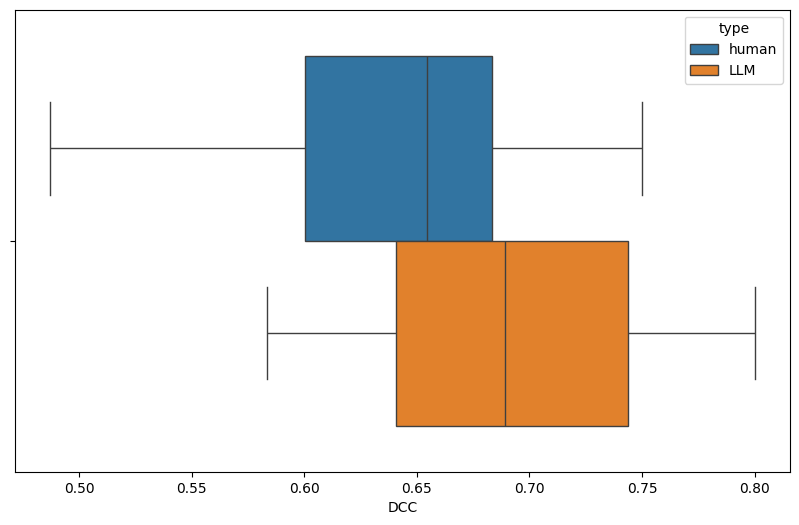

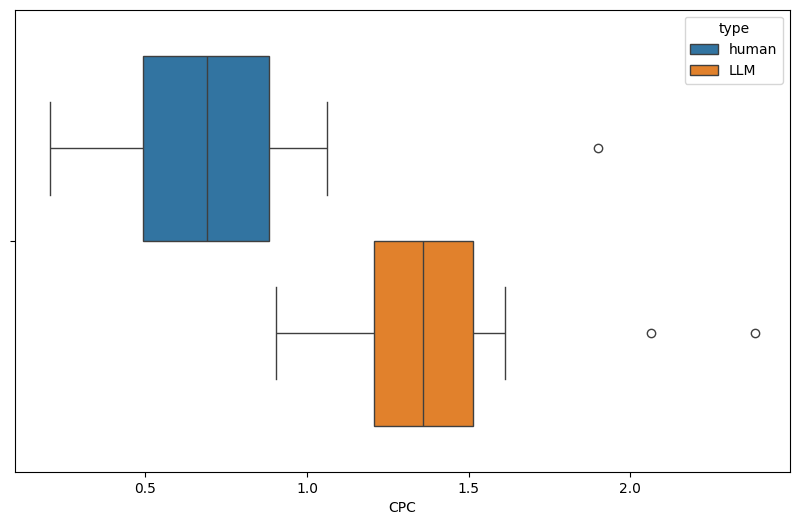

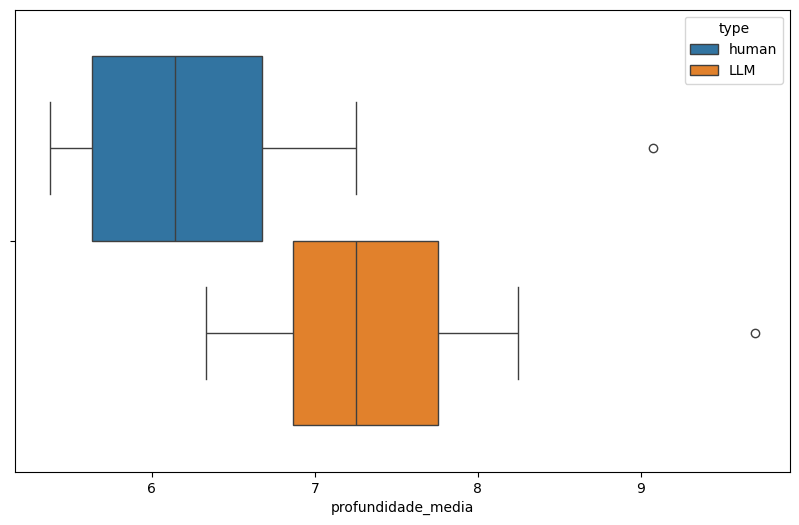

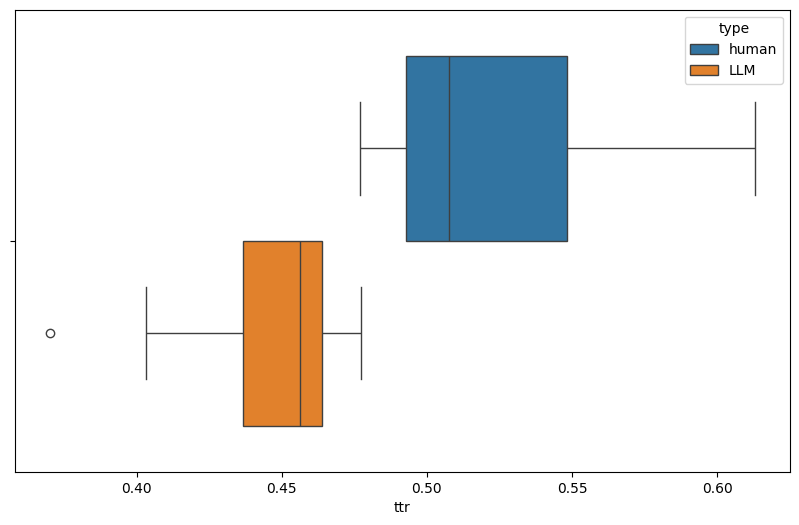

In [16]:
for feature in significant_ones["Feature"]: 
    plt.figure(figsize=(10, 6))  # Set figure size
    ax = sns.boxplot(data=df, hue="type", x=feature)
    plt.show()

In [17]:
df.groupby("type").count()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,lexical_density,lexical_sophistication,text
type,,,,,,,,,,
LLM,20,20,20,20,20,20,20,20,20,20
human,11,11,11,11,11,11,11,11,11,11


In [18]:
features = df[significant_ones["Feature"]]
features["type"] = df["type"]

/tmp/ipykernel_1160/2082278377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["type"] = df["type"]


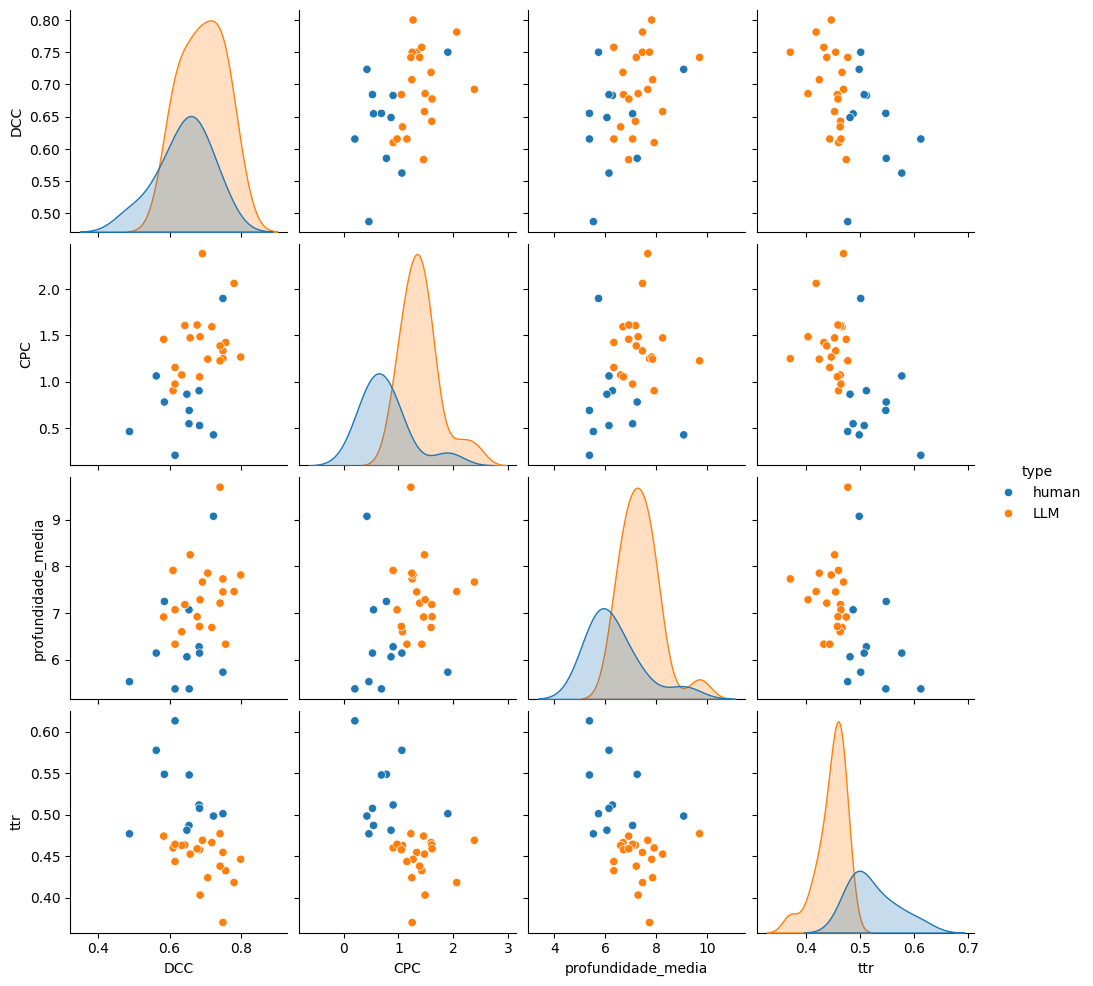

In [19]:
sns.pairplot(features,hue="type")
plt.show()